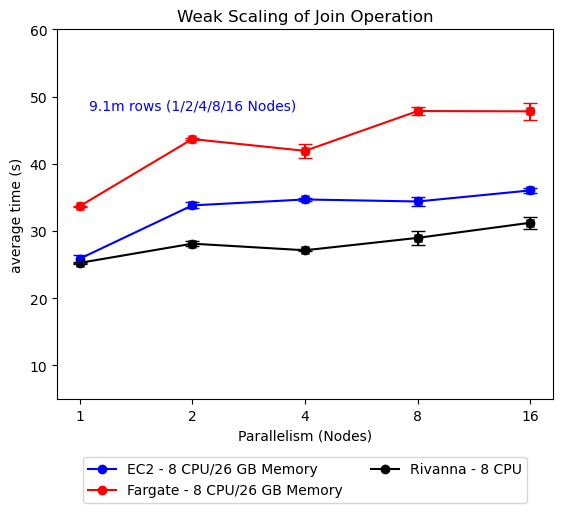

In [6]:
import matplotlib.pyplot as plt

# Given data
world_size = ['1', '2', '4', '8', '16']
ec2_4_26 = [25.87627161, 33.82108727, 34.70261905, 34.40150503, 36.04979236]
fargate_4_26 = [33.68915534, 43.69193071, 41.93854758, 47.86141147, 47.81775132]
rivanna_8 = [25.26343322, 28.12409517, 27.14304942, 28.98870633, 31.24031554]


ec2_4_26_err = [0.6267639415, 0.4297059082, 0.2713161653, 0.621981106, 0.3555366731]
fargate_4_26_err = [0.06717432151, 0.1975157265, 1.030607572, 0.6329357667, 1.287566371 ]
rivanna_8_err = [0.1507025937, 0.3740365494, 0.1460753863, 1.080150049, 0.8721500223]


# Create a line chart
plt.plot(world_size, ec2_4_26, marker='o', color='b', label='EC2 - 8 CPU/26 GB Memory')

plt.plot(world_size, fargate_4_26, marker='o', color='r', label='Fargate - 8 CPU/26 GB Memory')

plt.plot(world_size, rivanna_8, marker='o', color='black', label='Rivanna - 8 CPU')


plt.errorbar(world_size, ec2_4_26, yerr=ec2_4_26_err, fmt='x', color='b', ecolor='b', capsize=5)

plt.errorbar(world_size, fargate_4_26, yerr=fargate_4_26_err, fmt='x', color='r', ecolor='r', capsize=5)

plt.errorbar(world_size, rivanna_8, yerr=rivanna_8_err, fmt='x', color='black', ecolor='black', capsize=5)


custom_text = "9.1m rows (1/2/4/8/16 Nodes)"
plt.text(1, 48, custom_text, fontsize=10, color='blue', ha='center')

plt.ylim(5, 60)

plt.xticks(world_size)

# Add labels and title
plt.xlabel('Parallelism (Nodes)')
plt.ylabel('average time (s)')
plt.title('Weak Scaling of Join Operation')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2)

plt.savefig('join-w-scaling.svg', format='svg')

# Display the chart
plt.show()


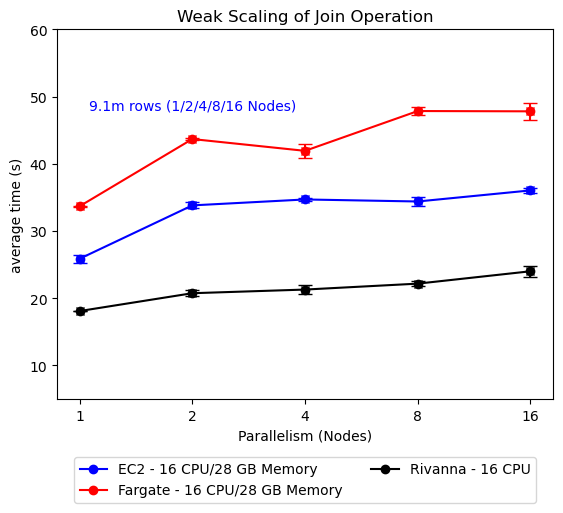

In [5]:
import matplotlib.pyplot as plt

# Given data
world_size = ['1', '2', '4', '8', '16']
ec2_4_26 = [25.87627161, 33.82108727, 34.70261905, 34.40150503, 36.04979236]
fargate_4_26 = [33.68915534, 43.69193071, 41.93854758, 47.86141147, 47.81775132]
rivanna_16 = [18.0953784, 20.75151962, 21.29517393, 22.17678279, 24.01665828]



ec2_4_26_err = [0.6267639415, 0.4297059082, 0.2713161653, 0.621981106, 0.3555366731]
fargate_4_26_err = [0.06717432151, 0.1975157265, 1.030607572, 0.6329357667, 1.287566371 ]
rivanna_16_err = [0.02347755255, 0.4246302028, 0.6883161402, 0.3344739079, 0.8557553027]


# Create a line chart
plt.plot(world_size, ec2_4_26, marker='o', color='b', label='EC2 - 16 CPU/28 GB Memory')

plt.plot(world_size, fargate_4_26, marker='o', color='r', label='Fargate - 16 CPU/28 GB Memory')

plt.plot(world_size, rivanna_16, marker='o', color='black', label='Rivanna - 16 CPU')


plt.errorbar(world_size, ec2_4_26, yerr=ec2_4_26_err, fmt='x', color='b', ecolor='b', capsize=5)

plt.errorbar(world_size, fargate_4_26, yerr=fargate_4_26_err, fmt='x', color='r', ecolor='r', capsize=5)

plt.errorbar(world_size, rivanna_16, yerr=rivanna_16_err, fmt='x', color='black', ecolor='black', capsize=5)


custom_text = "9.1m rows (1/2/4/8/16 Nodes)"
plt.text(1, 48, custom_text, fontsize=10, color='blue', ha='center')

plt.ylim(5, 60)

plt.xticks(world_size)

# Add labels and title
plt.xlabel('Parallelism (Nodes)')
plt.ylabel('average time (s)')
plt.title('Weak Scaling of Join Operation')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2)

plt.savefig('join-w-scaling.svg', format='svg')

# Display the chart
plt.show()

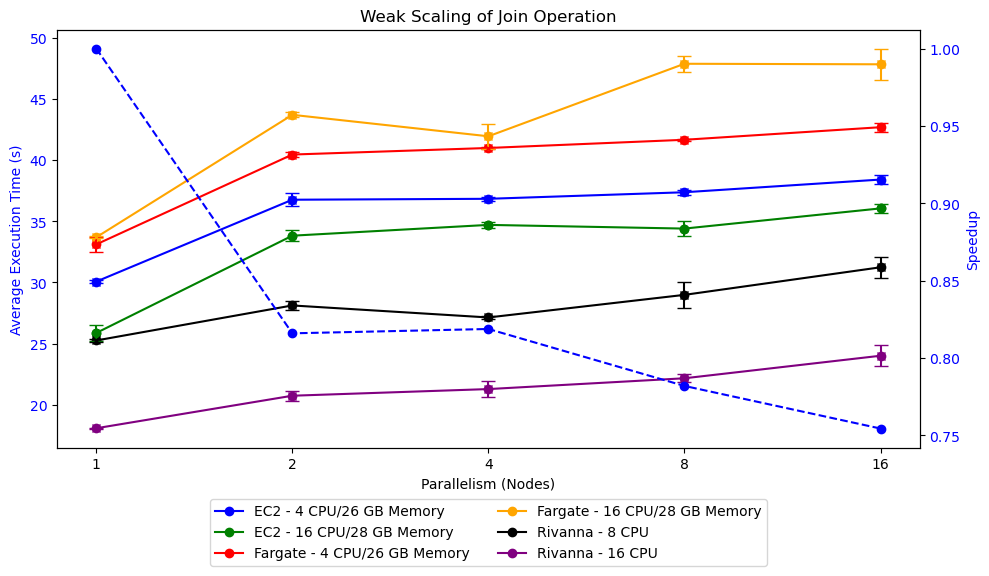

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
world_size = ['1', '2', '4', '8', '16']
ec2_4_26 = [30.07260311, 36.75810435, 36.8333492, 37.36801396, 38.40536711]
fargate_4_26 = [33.10924017, 40.44705766, 40.98437908, 41.65330167, 42.67971209]
rivanna_8 = [25.26343322, 28.12409517, 27.14304942, 28.98870633, 31.24031554]
ec2_16_28 = [25.87627161, 33.82108727, 34.70261905, 34.40150503, 36.04979236]
fargate_16_28 = [33.68915534, 43.69193071, 41.93854758, 47.86141147, 47.81775132]
rivanna_16 = [18.0953784, 20.75151962, 21.29517393, 22.17678279, 24.01665828]

# Combine all datasets into a single array for averaging
datasets = np.array([
    ec2_4_26,   # Dataset 1
    ec2_16_28,   # Dataset 2
    fargate_4_26,   # Dataset 3
    fargate_16_28,   # Dataset 4
    rivanna_8,   # Dataset 5
    rivanna_16     # Dataset 6
])

# Calculate the average execution time for each number of nodes
avg_execution_time = np.mean(datasets, axis=0)

# Calculate speedup (S_p = T_1 / T_p)
speedup = avg_execution_time[0] / avg_execution_time  # Baseline is avg_execution_time[0]
speedup[0] = 1  # Speedup for a single node is always 1


ec2_4_26_err = [0.1131030894, 0.5180851482, 0.1446106828, 0.2227162348, 0.3716563786]
fargate_4_26_err = [0.6058061564, 0.2160810761, 0.09299520892, 0.079750625, 0.37079083]
rivanna_8_err = [0.1507025937, 0.3740365494, 0.1460753863, 1.080150049, 0.8721500223]
ec2_16_28_err = [0.6267639415, 0.4297059082, 0.2713161653, 0.621981106, 0.3555366731]
fargate_16_28_err = [0.06717432151, 0.1975157265, 1.030607572, 0.6329357667, 1.287566371 ]
rivanna_16_err = [0.02347755255, 0.4246302028, 0.6883161402, 0.3344739079, 0.8557553027]


# Create the main plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot execution times
ax1.plot(world_size, ec2_4_26, marker='o', color='b', label='EC2 - 4 CPU/26 GB Memory')
ax1.plot(world_size, ec2_16_28, marker='o', color='g', label='EC2 - 16 CPU/28 GB Memory')
ax1.plot(world_size, fargate_4_26, marker='o', color='r', label='Fargate - 4 CPU/26 GB Memory')
ax1.plot(world_size, fargate_16_28, marker='o', color='orange', label='Fargate - 16 CPU/28 GB Memory')
ax1.plot(world_size, rivanna_8, marker='o', color='black', label='Rivanna - 8 CPU')
ax1.plot(world_size, rivanna_16, marker='o', color='purple', label='Rivanna - 16 CPU')

# Add error bars
ax1.errorbar(world_size, ec2_4_26, yerr=ec2_4_26_err, fmt='x', color='b', ecolor='b', capsize=5)
ax1.errorbar(world_size, ec2_16_28, yerr=ec2_16_28_err, fmt='o', color='g', ecolor='g', capsize=5)
ax1.errorbar(world_size, fargate_4_26, yerr=fargate_4_26_err, fmt='x', color='r', ecolor='r', capsize=5)
ax1.errorbar(world_size, fargate_16_28, yerr=fargate_16_28_err, fmt='x', color='orange', ecolor='orange', capsize=5)
ax1.errorbar(world_size, rivanna_8, yerr=rivanna_8_err, fmt='x', color='black', ecolor='black', capsize=5)
ax1.errorbar(world_size, rivanna_16, yerr=rivanna_16_err, fmt='x', color='purple', ecolor='purple', capsize=5)

# Customize primary y-axis
ax1.set_xlabel('Parallelism (Nodes)')
ax1.set_ylabel('Average Execution Time (s)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Weak Scaling of Join Operation')

# Add a second y-axis for speedup
ax2 = ax1.twinx()
ax2.plot(world_size, speedup, 'o--', color='blue', label='Speedup (Avg)')
ax2.set_ylabel('Speedup', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legends
ax1.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2) 
#ax1.legend(loc="upper left")
#ax2.legend(loc="upper right")

# Adjust layout and save
plt.tight_layout()
plt.savefig('join-s-scaling-speedup.svg', format='svg')
plt.show()


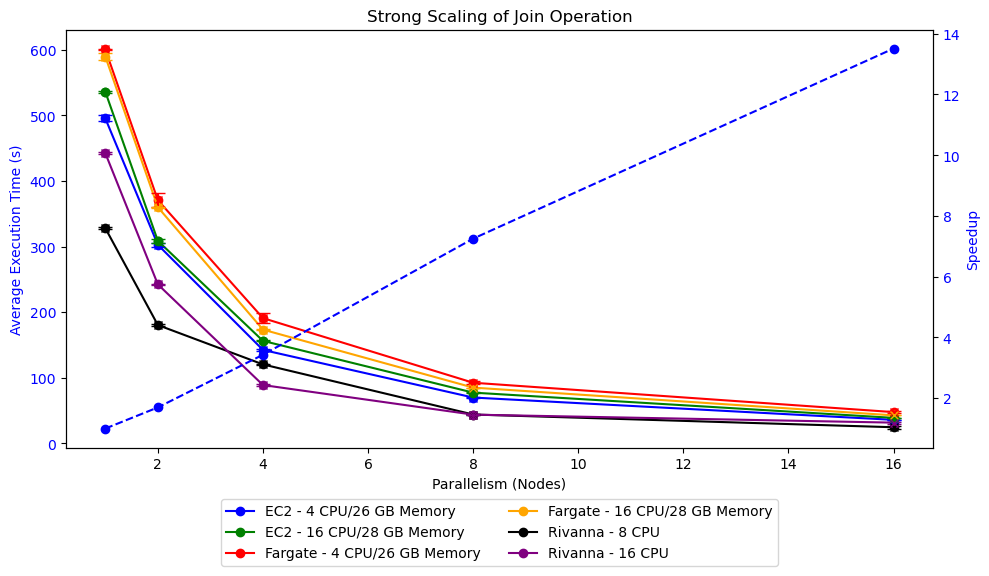

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
world_size = np.array([1, 2, 4, 8, 16])
ec2_4_26 = [495.4078959, 302.6540859, 142.4376676, 69.86648399, 35.88257558]
ec2_16_28 = [535.9114144, 308.6439486, 156.2365458, 77.36085331, 38.89793038]
fargate_4_26 = [600.4013957, 370.675751, 190.9241916, 92.44666022, 47.68765814]
fargate_16_28 = [589.6514282, 359.9262111, 173.3963722, 85.02315068, 42.71290874]
rivanna_8 = [328.0201343, 180.3587491, 120.3883617, 44.00059174, 24.60217872]
rivanna_16 = [442.3928684, 242.3194724, 88.91326633, 43.80879474, 31.62299151]

# Combine all datasets into a single array for averaging
datasets = np.array([
    ec2_4_26,   # Dataset 1
    ec2_16_28,   # Dataset 2
    fargate_4_26,   # Dataset 3
    fargate_16_28,   # Dataset 4
    rivanna_8,   # Dataset 5
    rivanna_16     # Dataset 6
])

# Calculate the average execution time for each number of nodes
avg_execution_time = np.mean(datasets, axis=0)

# Calculate speedup (S_p = T_1 / T_p)
speedup = avg_execution_time[0] / avg_execution_time  # Baseline is avg_execution_time[0]
speedup[0] = 1  # Speedup for a single node is always 1

# Error data
ec2_4_26_err = [4.754580205, 2.778065113, 1.390112323, 1.087893747, 0.4623471109]
ec2_16_28_err = [1.40583098, 2.646770157, 0.6611290868, 0.2772395205, 0.5265379111]
fargate_4_26_err = [1.422870019, 10.69626568, 7.278391911, 2.416088111, 1.1174448]
fargate_16_28_err = [5.888048933, 0.7656770765, 0.1858480036, 0.04901695341, 0.0007517733369]
rivanna_8_err = [1.908969754, 0.9143426026, 0.663205159, 0.6188113329, 1.979514289]
rivanna_16_err = [1.675233477, 0.630348115, 1.034757767, 0.546081538, 1.363729364]

# Create the main plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot execution times
ax1.plot(world_size, ec2_4_26, marker='o', color='b', label='EC2 - 4 CPU/26 GB Memory')
ax1.plot(world_size, ec2_16_28, marker='o', color='g', label='EC2 - 16 CPU/28 GB Memory')
ax1.plot(world_size, fargate_4_26, marker='o', color='r', label='Fargate - 4 CPU/26 GB Memory')
ax1.plot(world_size, fargate_16_28, marker='o', color='orange', label='Fargate - 16 CPU/28 GB Memory')
ax1.plot(world_size, rivanna_8, marker='o', color='black', label='Rivanna - 8 CPU')
ax1.plot(world_size, rivanna_16, marker='o', color='purple', label='Rivanna - 16 CPU')

# Add error bars
ax1.errorbar(world_size, ec2_4_26, yerr=ec2_4_26_err, fmt='x', color='b', ecolor='b', capsize=5)
ax1.errorbar(world_size, ec2_16_28, yerr=ec2_16_28_err, fmt='o', color='g', ecolor='g', capsize=5)
ax1.errorbar(world_size, fargate_4_26, yerr=fargate_4_26_err, fmt='x', color='r', ecolor='r', capsize=5)
ax1.errorbar(world_size, fargate_16_28, yerr=fargate_16_28_err, fmt='x', color='orange', ecolor='orange', capsize=5)
ax1.errorbar(world_size, rivanna_8, yerr=rivanna_8_err, fmt='x', color='black', ecolor='black', capsize=5)
ax1.errorbar(world_size, rivanna_16, yerr=rivanna_16_err, fmt='x', color='purple', ecolor='purple', capsize=5)

# Customize primary y-axis
ax1.set_xlabel('Parallelism (Nodes)')
ax1.set_ylabel('Average Execution Time (s)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Strong Scaling of Join Operation')

# Add a second y-axis for speedup
ax2 = ax1.twinx()
ax2.plot(world_size, speedup, 'o--', color='blue', label='Speedup (Avg)')
ax2.set_ylabel('Speedup', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legends
ax1.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2) 
#ax1.legend(loc="upper left")
#ax2.legend(loc="upper right")

# Adjust layout and save
plt.tight_layout()
plt.savefig('join-s-scaling-speedup.svg', format='svg')
plt.show()


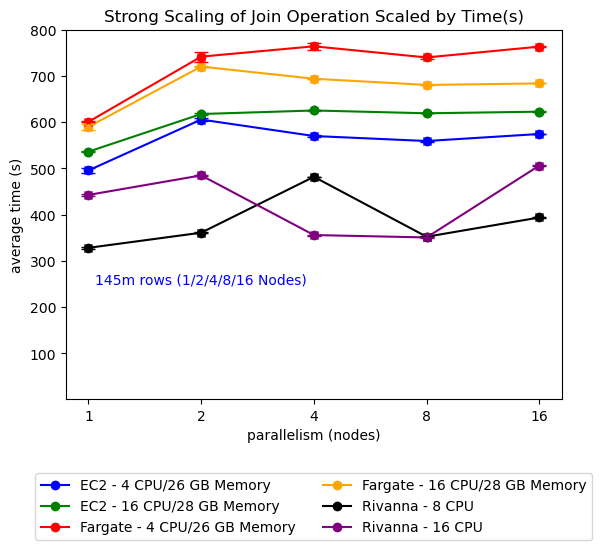

In [69]:
import matplotlib.pyplot as plt

# Given data
world_size = ['1', '2', '4', '8', '16']
ec2_4_26 = [495.4078959, 302.6540859*2, 142.4376676*4, 69.86648399*8, 35.88257558*16]
ec2_16_28 = [535.9114144, 308.6439486*2, 156.2365458*4, 77.36085331*8, 38.89793038*16]
fargate_4_26 = [600.4013957,370.675751*2, 190.9241916*4, 92.44666022*8, 47.68765814*16 ]
fargate_16_28 = [589.6514282, 359.9262111*2, 173.3963722*4, 85.02315068*8, 42.71290874*16]
rivanna_8 = [328.0201343, 180.3587491*2, 120.3883617*4, 44.00059174*8, 24.60217872*16]
rivanna_16 = [442.3928684, 242.3194724*2, 88.91326633*4, 43.80879474*8, 31.62299151*16]


ec2_4_26_err = [4.754580205, 2.778065113, 1.390112323, 1.087893747, 0.4623471109]
ec2_16_28_err = [1.40583098, 2.646770157, 0.6611290868, 0.2772395205, 0.5265379111]
fargate_4_26_err = [1.422870019, 10.69626568, 7.278391911, 2.416088111, 1.1174448]
fargate_16_28_err = [5.888048933, 0.7656770765, 0.1858480036, 0.04901695341, 0.0007517733369]
rivanna_8_err = [1.908969754, 0.9143426026, 0.663205159, 0.6188113329, 1.979514289]
rivanna_16_err = [1.675233477, 0.630348115, 1.034757767, 0.546081538, 1.363729364]


# Create a line chart
plt.plot(world_size, ec2_4_26, marker='o', color='b', label='EC2 - 4 CPU/26 GB Memory')
plt.plot(world_size, ec2_16_28, marker='o', color='g', label='EC2 - 16 CPU/28 GB Memory')
plt.plot(world_size, fargate_4_26, marker='o', color='r', label='Fargate - 4 CPU/26 GB Memory')
plt.plot(world_size, fargate_16_28, marker='o', color='orange', label='Fargate - 16 CPU/28 GB Memory')
plt.plot(world_size, rivanna_8, marker='o', color='black', label='Rivanna - 8 CPU')
plt.plot(world_size, rivanna_16, marker='o', color='purple', label='Rivanna - 16 CPU')


plt.errorbar(world_size, ec2_4_26, yerr=ec2_4_26_err, fmt='x', color='b', ecolor='b', capsize=5)
plt.errorbar(world_size, ec2_16_28, yerr=ec2_16_28_err, fmt='o', color='g', ecolor='g', capsize=5)
plt.errorbar(world_size, fargate_4_26, yerr=fargate_4_26_err, fmt='x', color='r', ecolor='r', capsize=5)
plt.errorbar(world_size, fargate_16_28, yerr=fargate_16_28_err, fmt='x', color='orange', ecolor='orange', capsize=5)
plt.errorbar(world_size, rivanna_8, yerr=rivanna_8_err, fmt='x', color='black', ecolor='black', capsize=5)
plt.errorbar(world_size, rivanna_16, yerr=rivanna_16_err, fmt='x', color='purple', ecolor='purple', capsize=5)


custom_text = "145m rows (1/2/4/8/16 Nodes)"
plt.text(1, 250, custom_text, fontsize=10, color='blue', ha='center')

plt.ylim(1, 800)

plt.xticks(world_size)

# Add labels and title
plt.xlabel('parallelism (nodes)')
plt.ylabel('average time (s)')
plt.title('Strong Scaling of Join Operation Scaled by Time(s)')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2) 

plt.savefig('join-s-scaling.svg', format='svg')

# Display the chart
plt.show()

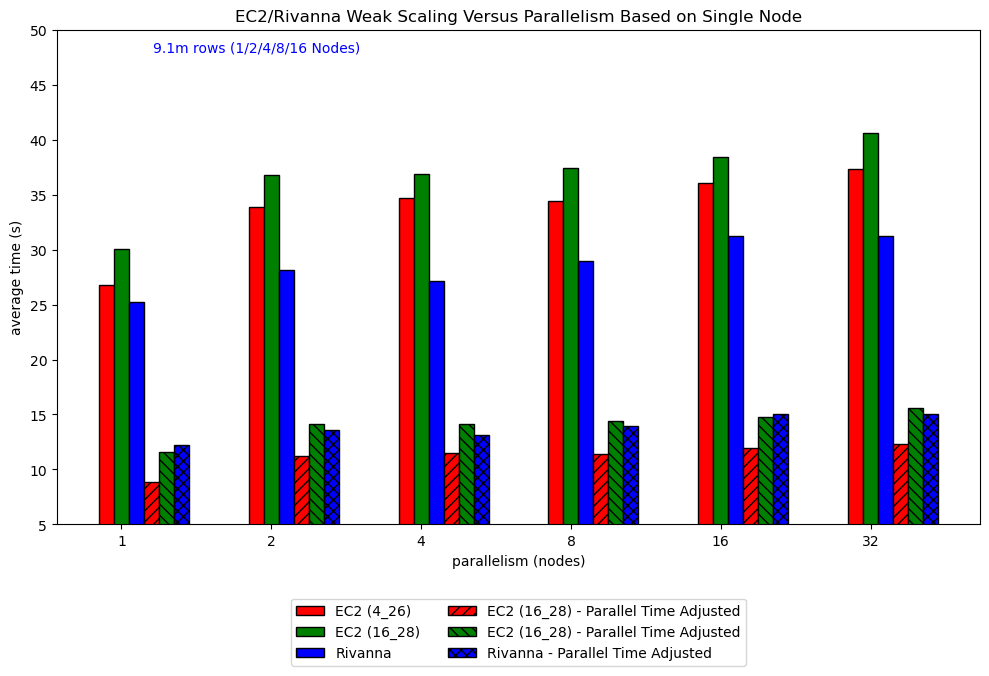

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
world_size = ['1', '2', '4', '8', '16', '32']
ec2_4_26 = [26.80001503, 33.82108727, 34.70261905, 34.40150503, 36.04979236, 37.27805637]
ec2_16_28 = [30.07260311, 36.75810435, 36.8333492, 37.36801396, 38.40536711, 40.62146824]
fargate_4_26 = [33.68554413, 42.44095802, 43.11394629, 46.3293512, 47.92054052, 49.26676557]
fargate_16_28 = [31.50847322, 40.88083729, 40.72470558, 41.43658119, 42.52811459, 42.37463084]
rivanna_8 = [25.98013163, 28.41809341, 30.62765954, 29.37659091, 30.77450389, 30.77450389]
rivanna_16 = [25.26343322, 28.12409517, 27.14304942, 28.98870633, 31.24031554, 31.24031554]

ec2_4_26_2 = [26.80001503/3.021825373, 33.82108727/3.021825373, 34.70261905/3.021825373, 34.40150503/3.021825373, 36.04979236/3.021825373, 37.27805637/3.021825373]
ec2_16_28_2 = [30.07260311/2.598218739, 36.75810435/2.598218739, 36.8333492/2.598218739, 37.36801396/2.598218739, 38.40536711/2.598218739, 40.62146824/2.598218739]
fargate_4_26_2 = [33.68554413/10.42936128	, 42.44095802/10.42936128	, 43.11394629/10.42936128	, 46.3293512/10.42936128	, 47.92054052/10.42936128	, 49.26676557/10.42936128	]
fargate_16_28_2 = [31.50847322/5.220078409	, 40.88083729/5.220078409	, 40.72470558/5.220078409	, 41.43658119/5.220078409	, 42.52811459/5.220078409	, 42.37463084/5.220078409	]
rivanna_8_2_2 = [25.98013163/2.072015524, 28.41809341/2.072015524, 30.62765954/2.072015524, 29.37659091/2.072015524, 30.77450389/2.072015524, 30.77450389/2.072015524]
rivanna_16_2 = [25.26343322/2.072015524, 28.12409517/2.072015524, 27.14304942/2.072015524, 28.98870633/2.072015524, 31.24031554/2.072015524, 31.24031554/2.072015524]

# set width of bar
barWidth = 0.1

br1 = np.arange(len(world_size))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]


fig = plt.subplots(figsize =(10, 7))

plt.bar(br1, ec2_4_26, color ='r', width = barWidth,
        edgecolor ='black', label ='EC2 (4_26)')
plt.bar(br2, ec2_16_28, color ='g', width = barWidth,
        edgecolor ='black', label ='EC2 (16_28)')
plt.bar(br3, rivanna_16, color ='b', width = barWidth,
        edgecolor ='black', label ='Rivanna')
plt.bar(br4, ec2_4_26_2,  color ='r', width = barWidth,
        edgecolor ='black', label ='EC2 (16_28) - Parallel Time Adjusted', hatch='///')
plt.bar(br5, ec2_16_28_2, color='g', width = barWidth,
        edgecolor ='black', label ='EC2 (16_28) - Parallel Time Adjusted', hatch="\\\\\\")
plt.bar(br6, rivanna_16_2,  color = 'b', width = barWidth,
        edgecolor ='black', label ='Rivanna - Parallel Time Adjusted', hatch='xxx')



# Create a line chart
#plt.plot(world_size, ec2_4_26, marker='o', color='b', label='EC2 - 8 CPU/26 GB Memory')
#plt.plot(world_size, ec2_16_28, marker='o', color='g', label='EC2 - 16 CPU/28 GB Memory')
#plt.plot(world_size, fargate_4_26, marker='o', color='r', label='Fargate - 8 CPU/26 GB Memory')
#plt.plot(world_size, fargate_16_28, marker='o', color='orange', label='Fargate - 16 CPU/28 GB Memory')
#plt.plot(world_size, rivanna_8, marker='o', color='black', label='Rivanna - 8 CPU')
#plt.plot(world_size, rivanna_16, marker='o', color='purple', label='Rivanna - 16 CPU')


custom_text = "9.1m rows (1/2/4/8/16 Nodes)"
plt.text(1, 48, custom_text, fontsize=10, color='blue', ha='center')

plt.ylim(5, 50)

#plt.xticks(world_size)
plt.xticks([r + barWidth for r in range(len(world_size))],
        world_size)

# Add labels and title
plt.xlabel('parallelism (nodes)')
plt.ylabel('average time (s)')
plt.title('EC2/Rivanna Weak Scaling Versus Parallelism Based on Single Node')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2) 
plt.tight_layout()

plt.savefig('join-w-scaling-adjusted.svg', format='svg')

# Display the chart
plt.show()

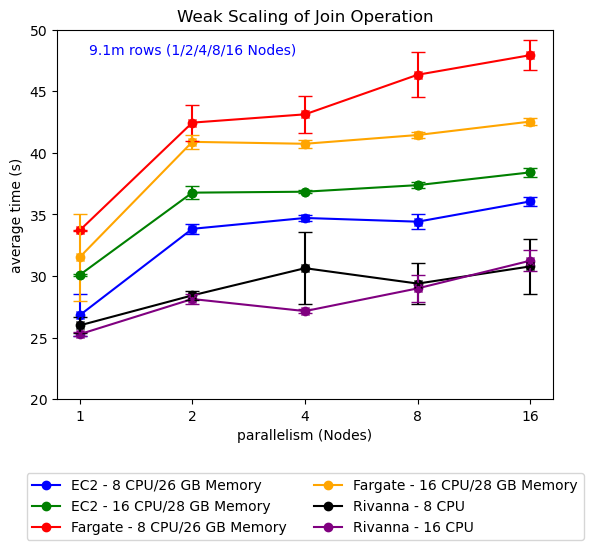

In [63]:
import matplotlib.pyplot as plt

# Given data
world_size = ['1', '2', '4', '8', '16']
ec2_4_26 = [26.80001503, 33.82108727, 34.70261905, 34.40150503, 36.04979236]
ec2_16_28 = [30.07260311, 36.75810435, 36.8333492, 37.36801396, 38.40536711]
fargate_4_26 = [33.68554413, 42.44095802, 43.11394629, 46.3293512, 47.92054052]
fargate_16_28 = [31.50847322, 40.88083729, 40.72470558, 41.43658119, 42.52811459]
rivanna_8 = [25.98013163, 28.41809341, 30.62765954, 29.37659091, 30.77450389]
rivanna_16 = [25.26343322, 28.12409517, 27.14304942, 28.98870633, 31.24031554]

ec2_4_26_err = [1.690741089, 0.4297059082, 0.2713161653, 0.621981106, 0.3555366731]
ec2_16_28_err = [0.1131030894, 0.5180851482, 0.1446106828, 0.2227162348, 0.3716563786]
fargate_4_26_err = [0.05400982477, 1.46033826, 1.515233265, 1.808315597, 1.200178515]
fargate_16_28_err = [3.518690911, 0.5573273239, 0.3047347395, 0.2670398924, 0.2849529409]
rivanna_8_err = [0.6486999821, 0.3616146377, 2.897190918, 1.677787319, 2.216267362]
rivanna_16_err = [0.1507025937, 0.3740365494, 0.1460753863, 1.080150049, 0.8721500223]

# Create a line chart
plt.plot(world_size, ec2_4_26, marker='o', color='b', label='EC2 - 8 CPU/26 GB Memory')
plt.plot(world_size, ec2_16_28, marker='o', color='g', label='EC2 - 16 CPU/28 GB Memory')
plt.plot(world_size, fargate_4_26, marker='o', color='r', label='Fargate - 8 CPU/26 GB Memory')
plt.plot(world_size, fargate_16_28, marker='o', color='orange', label='Fargate - 16 CPU/28 GB Memory')
plt.plot(world_size, rivanna_8, marker='o', color='black', label='Rivanna - 8 CPU')
plt.plot(world_size, rivanna_16, marker='o', color='purple', label='Rivanna - 16 CPU')

plt.errorbar(world_size, ec2_4_26, yerr=ec2_4_26_err, fmt='x', color='b', ecolor='b', capsize=5)
plt.errorbar(world_size, ec2_16_28, yerr=ec2_16_28_err, fmt='o', color='g', ecolor='g', capsize=5)
plt.errorbar(world_size, fargate_4_26, yerr=fargate_4_26_err, fmt='x', color='r', ecolor='r', capsize=5)
plt.errorbar(world_size, fargate_16_28, yerr=fargate_16_28_err, fmt='x', color='orange', ecolor='orange', capsize=5)
plt.errorbar(world_size, rivanna_8, yerr=rivanna_8_err, fmt='x', color='black', ecolor='black', capsize=5)
plt.errorbar(world_size, rivanna_16, yerr=rivanna_16_err, fmt='x', color='purple', ecolor='purple', capsize=5)

custom_text = "9.1m rows (1/2/4/8/16 Nodes)"
plt.text(1, 48, custom_text, fontsize=10, color='blue', ha='center')

plt.ylim(20, 50)

plt.xticks(world_size)

# Add labels and title
plt.xlabel('parallelism (Nodes)')
plt.ylabel('average time (s)')
plt.title('Weak Scaling of Join Operation')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2) 

plt.savefig('join-w-scaling.svg', format='svg')

# Display the chart
plt.show()



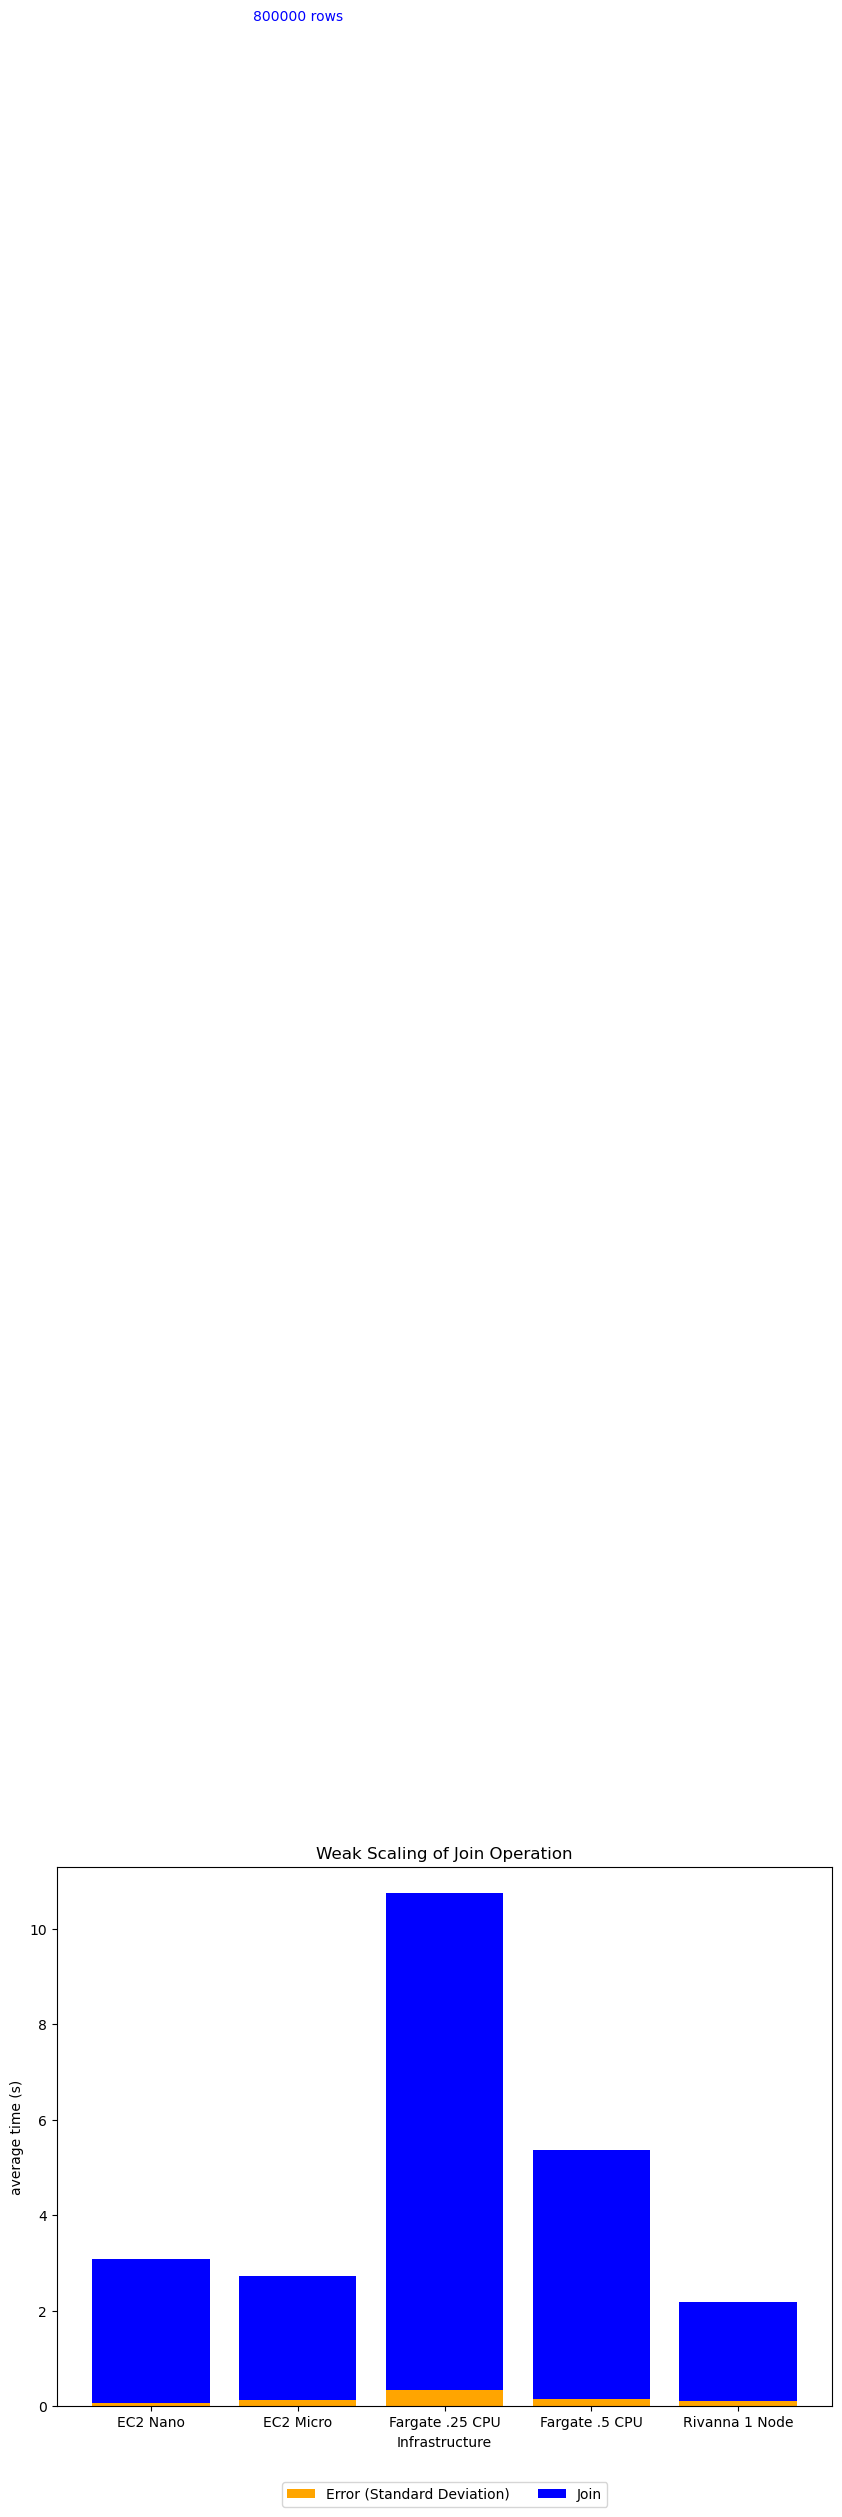

In [60]:
import matplotlib.pyplot as plt


# Given data
infrastructure = ['EC2 Nano', 'EC2 Micro', 'Fargate .25 CPU', 'Fargate .5 CPU', 'Rivanna 1 Node']
server = [3.021825373, 2.598218739, 10.42936128, 5.220078409, 2.072015524		]
server_err = [0.07005206974, 0.1331001051, 0.3293929105, 0.1551287397, 0.1036626711		 ]


fig = plt.subplots(figsize =(10, 7))
# Create a line chart
p1 = plt.bar(infrastructure, server_err,  color='orange', label ='Error (Standard Deviation)')
p2 = plt.bar(infrastructure, server,color='blue',
             bottom = server_err, label ='Join')
#plt.plot(world_size, ec2_16_28, marker='o', color='g', label='EC2 - 16 CPU/28 GB Memory')



#plt.errorbar(world_size, ec2_4_26, yerr=ec2_4_26_err, fmt='x', color='b', ecolor='b', capsize=5)
#plt.errorbar(world_size, ec2_16_28, yerr=ec2_16_28_err, fmt='o', color='g', ecolor='g', capsize=5)



custom_text = "800000 rows"
plt.text(1, 50, custom_text, fontsize=10, color='blue', ha='center')

#plt.ylim(10, 625)

#plt.xticks(infrastructure)

# Add labels and title
plt.xlabel('Infrastructure')
plt.ylabel('average time (s)')
plt.title('Weak Scaling of Join Operation')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=2) 

plt.savefig('join-w-scaling_inf.svg', format='svg')



# Display the chart
plt.show()

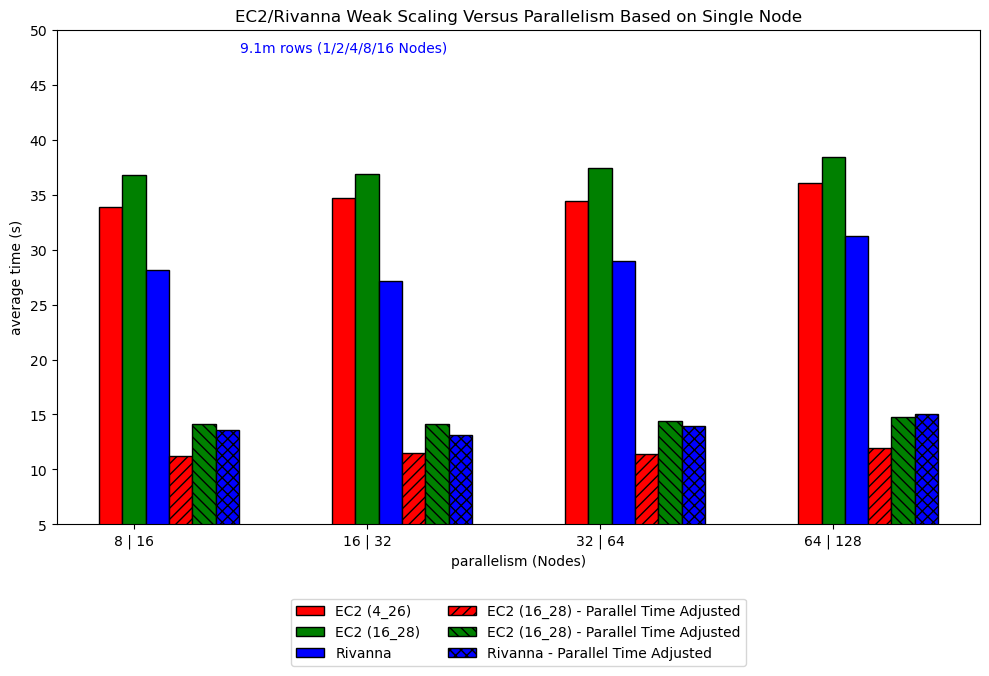

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
world_size = ['8 | 16', '16 | 32', '32 | 64', '64 | 128']
ec2_4_26 = [ 33.82108727, 34.70261905, 34.40150503, 36.04979236]
ec2_16_28 = [36.75810435, 36.8333492, 37.36801396, 38.40536711]
fargate_4_26 = [42.44095802, 43.11394629, 46.3293512, 47.92054052]
fargate_16_28 = [ 40.88083729, 40.72470558, 41.43658119, 42.52811459]
rivanna_8 = [ 28.41809341, 30.62765954, 29.37659091, 30.77450389]
rivanna_16 = [28.12409517, 27.14304942, 28.98870633, 31.24031554]

ec2_4_26_2 = [33.82108727/3.021825373, 34.70261905/3.021825373, 34.40150503/3.021825373, 36.04979236/3.021825373]
ec2_16_28_2 = [ 36.75810435/2.598218739, 36.8333492/2.598218739, 37.36801396/2.598218739, 38.40536711/2.598218739]
fargate_4_26_2 = [ 42.44095802/10.42936128	, 43.11394629/10.42936128	, 46.3293512/10.42936128	, 47.92054052/10.42936128		]
fargate_16_28_2 = [ 40.88083729/5.220078409	, 40.72470558/5.220078409	, 41.43658119/5.220078409	, 42.52811459/5.220078409		]
rivanna_8_2_2 = [28.41809341/2.072015524, 30.62765954/2.072015524, 29.37659091/2.072015524, 30.77450389/2.072015524]
rivanna_16_2 = [28.12409517/2.072015524, 27.14304942/2.072015524, 28.98870633/2.072015524, 31.24031554/2.072015524]

# set width of bar
barWidth = 0.1

br1 = np.arange(len(world_size))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]


fig = plt.subplots(figsize =(10, 7))

plt.bar(br1, ec2_4_26, color ='r', width = barWidth,
        edgecolor ='black', label ='EC2 (4_26)')
plt.bar(br2, ec2_16_28, color ='g', width = barWidth,
        edgecolor ='black', label ='EC2 (16_28)')
plt.bar(br3, rivanna_16, color ='b', width = barWidth,
        edgecolor ='black', label ='Rivanna')
plt.bar(br4, ec2_4_26_2,  color ='r', width = barWidth,
        edgecolor ='black', label ='EC2 (16_28) - Parallel Time Adjusted', hatch='///')
plt.bar(br5, ec2_16_28_2, color='g', width = barWidth,
        edgecolor ='black', label ='EC2 (16_28) - Parallel Time Adjusted', hatch="\\\\\\")
plt.bar(br6, rivanna_16_2,  color = 'b', width = barWidth,
        edgecolor ='black', label ='Rivanna - Parallel Time Adjusted', hatch='xxx')



# Create a line chart
#plt.plot(world_size, ec2_4_26, marker='o', color='b', label='EC2 - 8 CPU/26 GB Memory')
#plt.plot(world_size, ec2_16_28, marker='o', color='g', label='EC2 - 16 CPU/28 GB Memory')
#plt.plot(world_size, fargate_4_26, marker='o', color='r', label='Fargate - 8 CPU/26 GB Memory')
#plt.plot(world_size, fargate_16_28, marker='o', color='orange', label='Fargate - 16 CPU/28 GB Memory')
#plt.plot(world_size, rivanna_8, marker='o', color='black', label='Rivanna - 8 CPU')
#plt.plot(world_size, rivanna_16, marker='o', color='purple', label='Rivanna - 16 CPU')


custom_text = "9.1m rows (1/2/4/8/16 Nodes)"
plt.text(1, 48, custom_text, fontsize=10, color='blue', ha='center')

plt.ylim(5, 50)

#plt.xticks(world_size)
plt.xticks([r + barWidth for r in range(len(world_size))],
        world_size)

# Add labels and title
plt.xlabel('parallelism (Nodes)')
plt.ylabel('average time (s)')
plt.title('EC2/Rivanna Weak Scaling Versus Parallelism Based on Single Node')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2) 
plt.tight_layout()

plt.savefig('join-w-scaling-adjusted.svg', format='svg')

# Display the chart
plt.show()